In [1]:
from sklearn import svm, metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
import mglearn
import random, re
import numpy as np

Text(0,0.5,'Charactersitc 1')

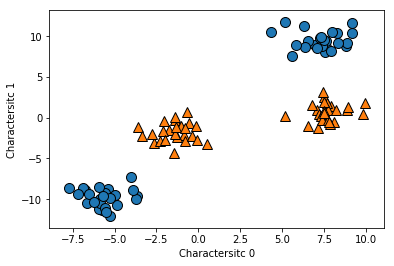

In [2]:
## center: 클러스터 개수, random_state = 난수 발생 시드
X, y = make_blobs(centers=4, random_state=8)

y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Charactersitc 0")
plt.ylabel("Charactersitc 1")
#print(y)
#print(X[:,0])

Text(0,0.5,'Charactersitc 1')

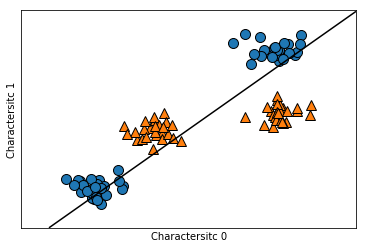

In [9]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm,X)

mglearn.discrete_scatter(X[:,0], X[:,1], y)

plt.xlabel("Charactersitc 0")
plt.ylabel("Charactersitc 1")

## 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어 맞지 않는다.

Text(0.5,0,'Characteristic 1 ** 2')

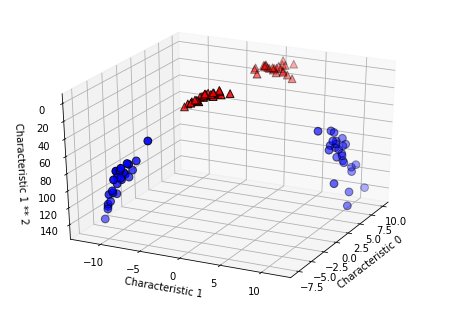

In [12]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

## 선형 모델을 유연하게 만드는 방법 중 하나는 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것입니다.
## 두 번째 특성을 제곱한 특성1 ** 2를 새로운 특성으로 추가해 입력 특성을 확장
## (특성0, 특성1) 2차원 데이터 포인트가 아니라 (특성0, 특성1, 특성1 ** 2)의 3차원 데이터 포인트로 표현

X_new = np.hstack([X, X[:,1:] ** 2])
figure = plt.figure()

## 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
## y==0인 포인트를 먼저 그리고 그 다음 y==1인 포인트를 그림
mask = y == 0

ax.scatter(X_new[mask, 0],  X_new[mask,  1], X_new[mask,  2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Characteristic 0")
ax.set_ylabel("Characteristic 1")
ax.set_zlabel("Characteristic 1 ** 2")

Text(0.5,0,'Characteristic 1 ** 2')

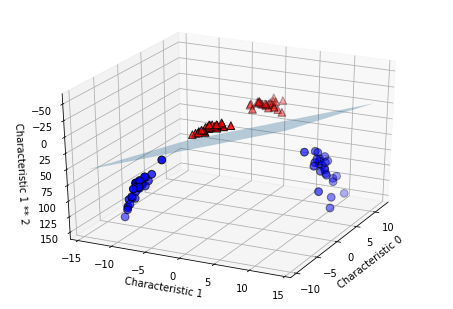

In [10]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Characteristic 0")
ax.set_ylabel("Characteristic 1")
ax.set_zlabel("Characteristic 1 ** 2")

Text(0,0.5,'Characteristic 1')

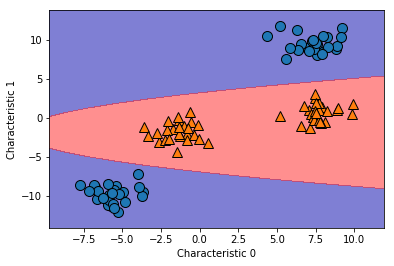

In [13]:
## 원래 2차원 데이터의 특성으로 프로젝션 시키면 이 선형 SVM 모델은 더 이상 선형이 아니게 됨
## 타원에 가까운 모습을 확인

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1")

## 이때, n차원의 입력 데이터를 m(>n)차원의 특징 데이터로 매핑시켜서 SVM을 이용하여 분류할 경우 차원 m이 아주 크다면
## 고차원의 특징 데이터를 이용해서 계산하는 것은 계산량을 매우 크게 증가시킨다.

Text(0,0.5,'Characteristic 1')

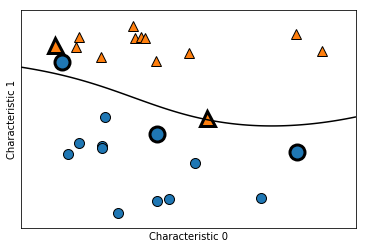

In [19]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()

## RBF(가우시안) 커널을 이용한 SVM
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

## 가우시안 커널은 지수 함수의 테일러 전개를 이용한 것으로 무한한 다항식 차원으로 매핑하는 효과를 만든다.
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

## 서포트 벡터
sv = svm.support_vectors_

## dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1")

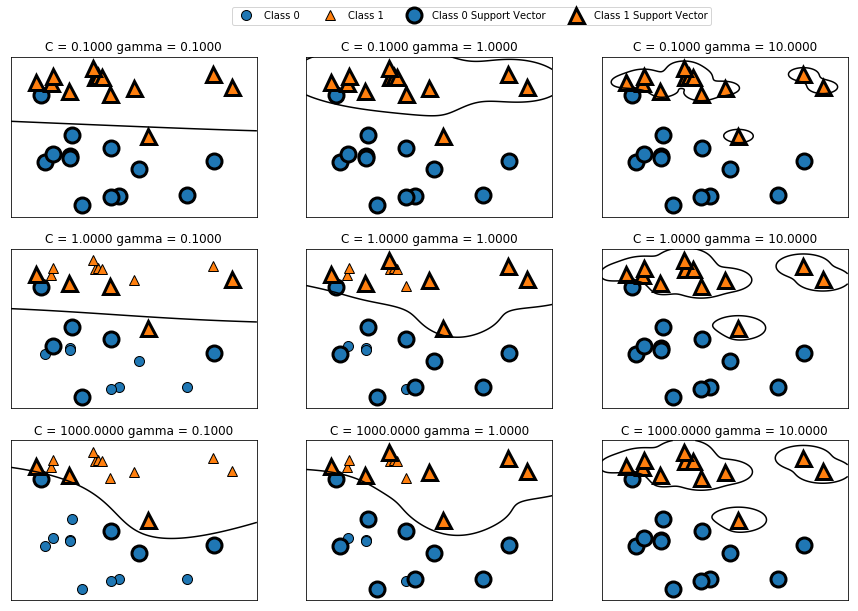

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

## gamma 매개변수는 \gamma로 가우시안 커널 폭의 역수 -> 하나의 훈련 샘플이 미치는 영향의 범위를 결정
## 작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향이 미치는 범위가 제한적
## 즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커지게 된다. 
## 작은 gamma값이 결정 경계를 천천히 바뀌게하여 모델의 복잡도를 낮춘다

## C 매개변수는 규제 매개변수, 각 포인트의 중요도를 제한 (오분류 허용도)
## C값이 작아질수록 제약이 큰 모델이 만들어지고 각 데이터 포인트의 영향력이 작아진다. 
## C값을 증가시키면 포인트들이 모델에 영향을 주며 결정 경계를 휘어서 정확하게 분류하게 한다. (엄격한 분류)

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["Class 0", "Class 1", "Class 0 Support Vector", "Class 1 Support Vector"],
                  ncol=4, loc=(.9, 1.2))

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


Text(0,0.5,'Characteristic Size')

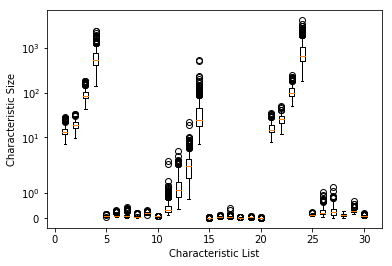

In [22]:
## SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 매우 민감하다. 
## 특히 입력 특성의 범위가 비슷해야 합니다. 

## 각 특성의 최솟값과 최댓값을 로그 스케일로 표현

plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Characteristic List")
plt.ylabel("Characteristic Size")

In [23]:
## 그래프를 통해 유방암 데이터셋의 특성의 자릿수 차이가 매우 크다
## 일부 모델(선형 모델 등)에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 큼.
## 이러한 문제의 해결 방법 중 하나는 특성 값의 범위가 비슷해지도록 조정
## 커널 SVM에서는 모든 특성값을 0과 1사이로 맞추는 방법을 많이 이용
## MinMaxScalar 전처리 메서드를 이용해 데이터를 처리하는 방법 

# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0, 최대값은 1입니다.
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값\n {}".format(X_train_scaled.max(axis=0)))

특성별 최소 값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대 값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [24]:
## 테스트 세트에도 같은 작업을 적용하지만
## 훈련 세트에서 계산한 최솟값과 범위를 사용합니다
X_test_scaled = (X_test - min_on_training) / range_on_training

In [25]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


In [26]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972
